In [10]:
# imports
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics

### Overview
Fire and Emergency Medical Services (EMS) department receives many calls. The calls are categorized as EMS or Fire/Other (which are fires, assists, and other events that are not categorized as EMS calls).

A higher priority call is categorized as more urgent (C or D or E) and lower priority is categorized as A or B or Omega. A high-priority EMS call is a Heart Attack, Trouble Breathing, Cardiac Arrest or Serious Injury.  A low-priority EMS call is a minor injury or sickness.  A high-priority Fire / Other Call is a fire, rescue, haz-mat, etc.  A Low-priority Fire / Other call is Assist citizen, Details, etc.

### Data Prep
We have two data sources:
1. 2015 publication from dc gov website that will be used a sample and baseline data. It has been parsed and formatted into csv file to mirror data expected from twitter feed.

2. Primary data is collected from twitter feed.

In [2]:
# load 2015 data as sample data
sample_df = pd.read_csv('./sample_twitter_data.csv')
sample_df.head()

,date,total_calls,critical,non_critical,fire,source
0,08/1/2014,512.0,215.0,216.0,81.0,https://twitter.com/dcfireems/status/08-1-2014
1,08/2/2014,513.0,215.0,215.0,83.0,https://twitter.com/dcfireems/status/08-2-2014
2,08/3/2014,516.0,218.0,214.0,84.0,https://twitter.com/dcfireems/status/08-3-2014
3,08/4/2014,516.0,219.0,213.0,84.0,https://twitter.com/dcfireems/status/08-4-2014
4,08/5/2014,517.0,217.0,217.0,83.0,https://twitter.com/dcfireems/status/08-5-2014


In [3]:
# check structure of the data - don't expect any missing data points
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          396 non-null    object 
 1   total_calls   396 non-null    float64
 2   critical      396 non-null    float64
 3   non_critical  396 non-null    float64
 4   fire          396 non-null    float64
 5   source        396 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.7+ KB


In [4]:
# convert date to DATETIME type and move to index
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df = sample_df.set_index('date')
sample_df.head()

,total_calls,critical,non_critical,fire,source
date,,,,,
2014-08-01,512.0,215.0,216.0,81.0,https://twitter.com/dcfireems/status/08-1-2014
2014-08-02,513.0,215.0,215.0,83.0,https://twitter.com/dcfireems/status/08-2-2014
2014-08-03,516.0,218.0,214.0,84.0,https://twitter.com/dcfireems/status/08-3-2014
2014-08-04,516.0,219.0,213.0,84.0,https://twitter.com/dcfireems/status/08-4-2014
2014-08-05,517.0,217.0,217.0,83.0,https://twitter.com/dcfireems/status/08-5-2014


In [5]:
# add ems column = crit + non_crit
sample_df['ems'] = sample_df.critical + sample_df.non_critical
sample_df.head()

,total_calls,critical,non_critical,fire,source,ems
date,,,,,,
2014-08-01,512.0,215.0,216.0,81.0,https://twitter.com/dcfireems/status/08-1-2014,431.0
2014-08-02,513.0,215.0,215.0,83.0,https://twitter.com/dcfireems/status/08-2-2014,430.0
2014-08-03,516.0,218.0,214.0,84.0,https://twitter.com/dcfireems/status/08-3-2014,432.0
2014-08-04,516.0,219.0,213.0,84.0,https://twitter.com/dcfireems/status/08-4-2014,432.0
2014-08-05,517.0,217.0,217.0,83.0,https://twitter.com/dcfireems/status/08-5-2014,434.0


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

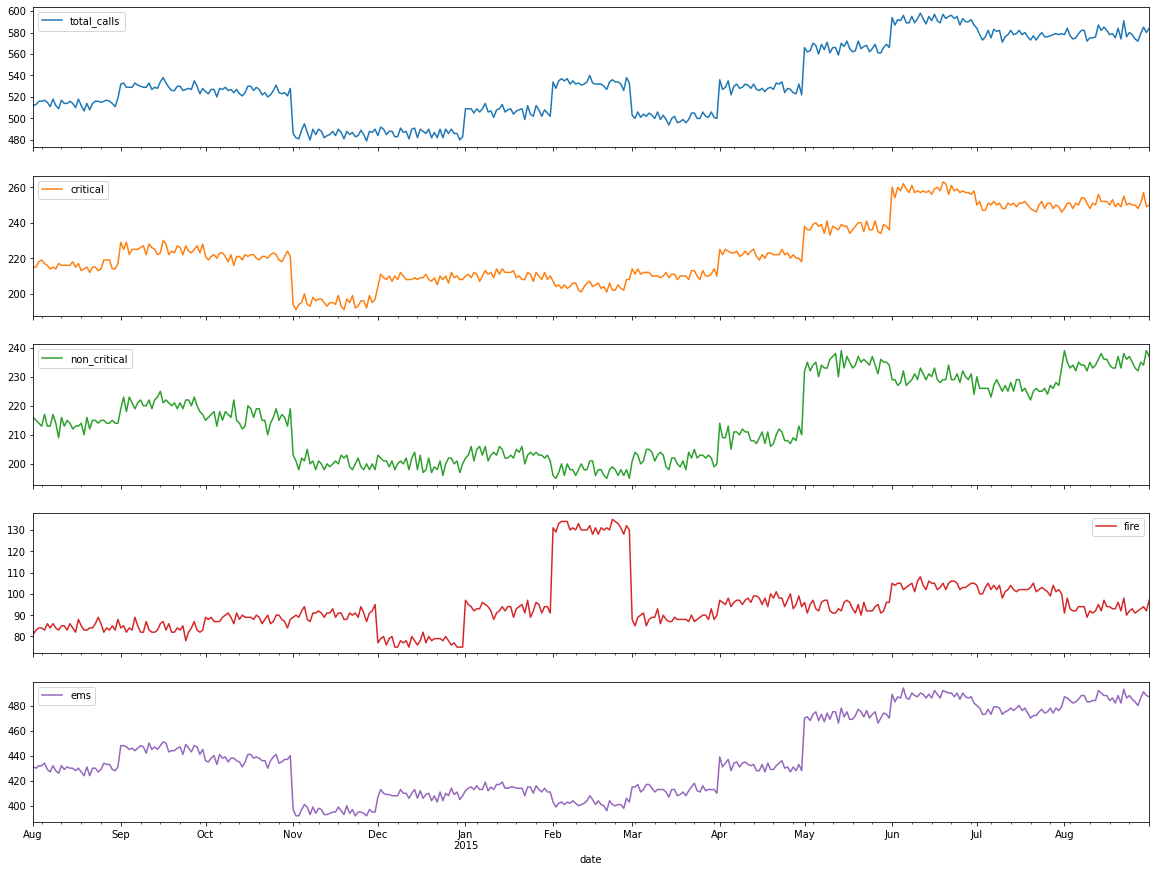

In [6]:
# let's visualize dispatched calls over time
sample_df.plot(subplots=True, figsize=(20, 15))

In [9]:
corr_matrix = sample_df.corr()
corr_matrix.total_calls.sort_values(ascending=False)

total_calls     1.000000
critical        0.938122
ems             0.931908
non_critical    0.865281
fire            0.419431
Name: total_calls, dtype: float64

In [17]:
def get_season(date: datetime) -> str:
    """Return season for given date."""
    year = date.year
    seasons = {
        'summer': (datetime(year, 6, 21), datetime(year, 9, 22)),
        'fall': (datetime(year, 9, 23), datetime(year, 12, 20)),
        'spring': (datetime(year, 3, 21), datetime(year, 6, 20))
    }
    for season, (season_start, season_end) in seasons.items():
        if season_start <= date <= season_end:
            return season
    else:
        return 'winter'

In [19]:
# add season as a feature
sample_df['season'] = sample_df.index.map(get_season)
sample_df.tail(100)

,total_calls,critical,non_critical,fire,source,ems,season
date,,,,,,,
2015-05-24,562.0,236.0,234.0,92.0,https://twitter.com/dcfireems/status/05-24-2015,470.0,spring
2015-05-25,565.0,236.0,237.0,92.0,https://twitter.com/dcfireems/status/05-25-2015,473.0,spring
2015-05-26,569.0,241.0,234.0,94.0,https://twitter.com/dcfireems/status/05-26-2015,475.0,spring
2015-05-27,561.0,235.0,231.0,95.0,https://twitter.com/dcfireems/status/05-27-2015,466.0,spring
2015-05-28,561.0,234.0,236.0,91.0,https://twitter.com/dcfireems/status/05-28-2015,470.0,spring
...,...,...,...,...,...,...,...
2015-08-27,572.0,248.0,232.0,92.0,https://twitter.com/dcfireems/status/08-27-2015,480.0,summer
2015-08-28,579.0,251.0,235.0,93.0,https://twitter.com/dcfireems/status/08-28-2015,486.0,summer
2015-08-29,585.0,257.0,234.0,94.0,https://twitter.com/dcfireems/status/08-29-2015,491.0,summer


#### Feature Engineering - Weather data

In [84]:
# load historical weather data and do some data prep
hist_df = pd.read_csv('./Munged_Washington_2014-08-01_2015-08-31.csv')
hist_df.date = pd.to_datetime(hist_df.date)
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  396 non-null    datetime64[ns]
 1   temp                                  396 non-null    float64       
 2   feels_like                            396 non-null    float64       
 3   pressure                              396 non-null    float64       
 4   humidity                              396 non-null    float64       
 5   wind_speed                            396 non-null    float64       
 6   wind_deg                              396 non-null    float64       
 7   avg_rain                              396 non-null    float64       
 8   avg_snow                              396 non-null    float64       
 9   clouds_all                            396 non-null    float64       
 10  to

In [85]:
# merge sample tweet data with engineered weather data
data_df = pd.merge(sample_df.reset_index(), hist_df, how='left', on='date')
data_df.head()

,date,total_calls,critical,non_critical,fire,source,ems,season,temp,feels_like,...,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear,weather_snow,weather_thunderstorm,weather_thunderstorm with heavy rain,weather_thunderstorm with light rain,weather_thunderstorm with rain,weather_very heavy rain
0,2014-08-01,512.0,215.0,216.0,81.0,https://twitter.com/dcfireems/status/08-1-2014,431.0,summer,76.485417,77.081667,...,0,1,1,0,0,0,0,0,0,0
1,2014-08-02,513.0,215.0,215.0,83.0,https://twitter.com/dcfireems/status/08-2-2014,430.0,summer,72.086250,72.544583,...,1,1,0,0,0,0,0,0,0,0
2,2014-08-03,516.0,218.0,214.0,84.0,https://twitter.com/dcfireems/status/08-3-2014,432.0,summer,76.405417,77.817500,...,0,1,0,0,0,0,0,0,0,0
3,2014-08-04,516.0,219.0,213.0,84.0,https://twitter.com/dcfireems/status/08-4-2014,432.0,summer,77.496000,78.456400,...,0,1,1,0,0,0,0,1,0,0
4,2014-08-05,517.0,217.0,217.0,83.0,https://twitter.com/dcfireems/status/08-5-2014,434.0,summer,81.150000,81.648750,...,0,0,1,1,0,0,0,0,0,0
